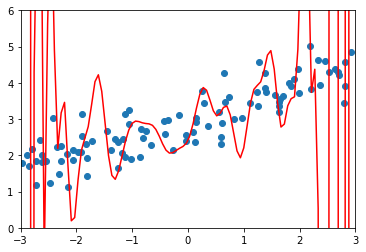

MSE= 13830317705.23303
alpha=0


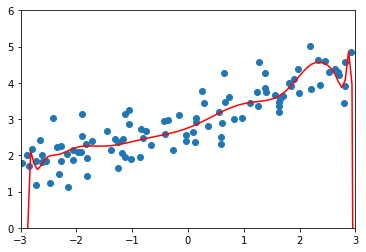

MSE= 106.40951621435116
alpha=0.0001


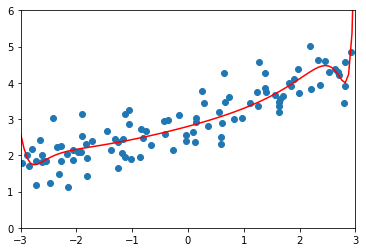

MSE= 0.30895644691210433
alpha=1


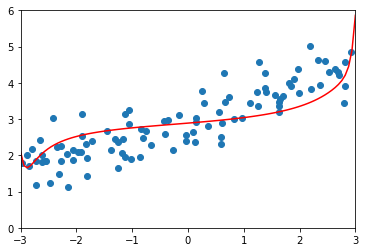

MSE= 0.46484547134290954
alpha=100


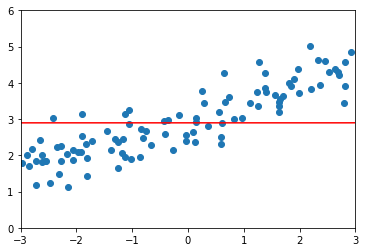

MSE= 1.143711986565338
alpha=10000000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#输入数据
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 0.5, size=100)
#plt.scatter(X, y)

#定义Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

#划分数据
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

#预测
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialRegression(degree=50)
poly_reg.fit(X_train, y_train)

#计算预测结果和真实结果的误差
y_poly_predict = poly_reg.predict(X_test)


#封装绘图程序
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)
print("MSE=",mean_squared_error(y_test, y_poly_predict))
print("alpha=0")

#岭回归
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

ridge1_reg = RidgeRegression(50, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
plot_model(ridge1_reg)
print("MSE=",mean_squared_error(y_test, y1_predict))
print("alpha=0.0001")

ridge2_reg = RidgeRegression(50, 1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
plot_model(ridge2_reg)
print("MSE=",mean_squared_error(y_test, y2_predict))
print("alpha=1")

ridge3_reg = RidgeRegression(50, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
plot_model(ridge3_reg)
print("MSE=",mean_squared_error(y_test, y3_predict))
print("alpha=100")

ridge4_reg = RidgeRegression(50, 10000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
plot_model(ridge4_reg)
print("MSE=",mean_squared_error(y_test, y4_predict))
print("alpha=10000000")